In [5]:
#importing libraries 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv("hotel_bookings.csv")

In [8]:
# checking the first five rows of our dataframe 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
#checking the size of our data (total number of rows and columns)
df.shape

(119390, 32)

In [11]:
#checking for missing values in the dataframe
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
#trying to see where agent null values correspond with other columns
df.loc[df["agent"].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,0.0,0,BB,PRT,Complementary,Corporate,0,0,0,A,A,0,No Deposit,NaN,72.0,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,2.0,0,BB,NLD,Direct,Direct,0,0,0,G,G,0,No Deposit,NaN,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,0.0,0,BB,BRA,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,0.0,0,SC,LBN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


The columns company and agent are missing a lot and they are both not consider to be relevent to this analysis.

In [13]:
df = df.drop(["company", "agent"], axis = 1)

In [15]:
# filling the null values in the children column with 0
df.loc[df["children"].isnull(), "children"] = 0

In [16]:
# droping null values left in the country column
df = df.dropna()

In [17]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [18]:
#saving cleaned data to csv
df.to_csv("cleaned_hotel_bookings.csv")

In [19]:
df.arrival_date_year.min(), df.arrival_date_year.max()

(2015, 2017)

<AxesSubplot:>

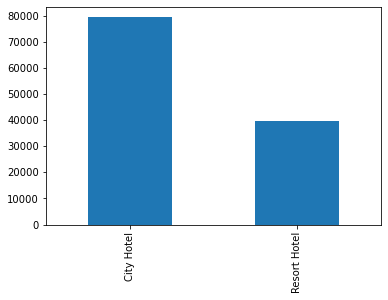

In [20]:
df.hotel.value_counts().plot(kind="bar")


From the above diagram, City Hotel seems to be more patronized between 2015 to 2017 and that shows how popular it is with almost 80,000 bookings in 3 years.

## SPLITTING BOTH HOTELS FOR ANALYSIS

### First we take a look into the city hotel


In [21]:
#filtering city hotel out of the main dataframe
city_hotel = df.loc[df["hotel"] == "City Hotel"].reset_index(drop=True)

In [22]:
city_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,City Hotel,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-07-01
2,City Hotel,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,68.0,0,1,Canceled,2015-04-30
3,City Hotel,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.5,0,2,Canceled,2015-06-23
4,City Hotel,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-04-02


In [27]:
#checking data types for city_hotels
city_hotel.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [28]:
#changing reservation_status-date to date format
city_hotel["reservation_status_date"] = pd.to_datetime(city_hotel["reservation_status_date"])

In [29]:
#checking the total booking for each year
yearly_booking = city_hotel.groupby("arrival_date_year").agg({"arrival_date_month" : "count"}
                                           ).reset_index().rename(columns=({"arrival_date_month": "Total_booking"}))

<AxesSubplot:xlabel='arrival_date_year', ylabel='Total_booking'>

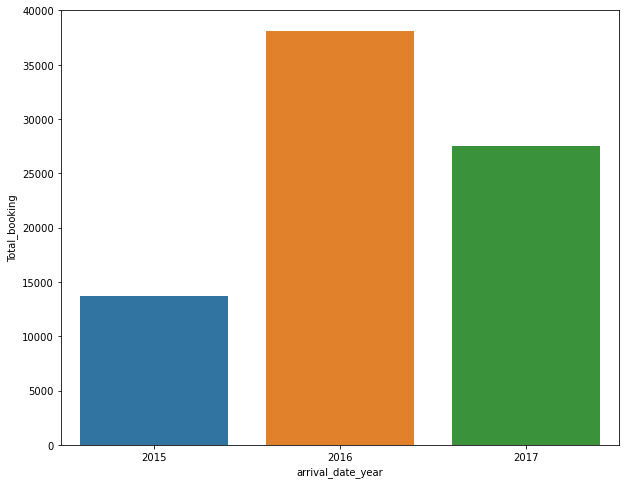

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=yearly_booking,
           x = "arrival_date_year",
           y = "Total_booking")

The bar plot highlight more booking was made in the 2016 while the year 2015 had the least total number of bookings at the city hotel.

In [33]:
#checking the total booking for each month as well
monthly_booking = city_hotel.groupby("arrival_date_month").agg({"arrival_date_year" : "count"}).reset_index()

In [34]:
monthly_booking

,arrival_date_month,arrival_date_year
0,April,7476
1,August,8983
2,December,4129
3,February,4965
4,January,3736
5,July,8088
6,June,7894
7,March,6458
8,May,8232
9,November,4354


In [36]:
# renaming arrival_date_year to total_booking
monthly_booking = monthly_booking.rename(columns=({"arrival_date_year": "Total_booking"})).sort_values("Total_booking")

<AxesSubplot:xlabel='arrival_date_month', ylabel='Total_booking'>

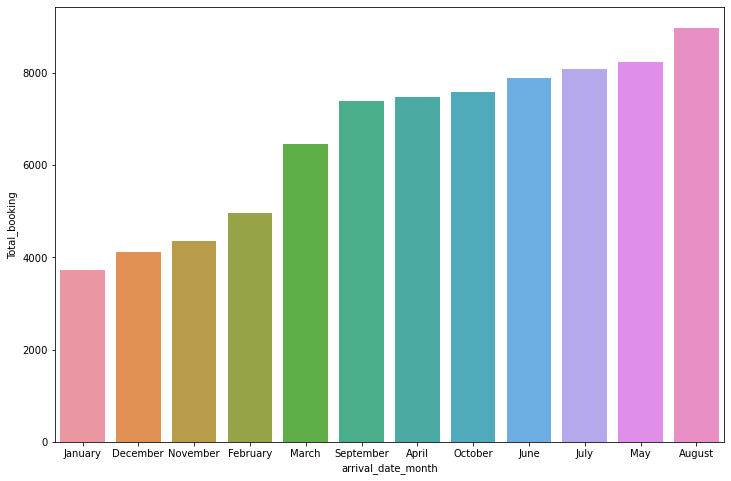

In [37]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=monthly_booking,
         x= "arrival_date_month",
        y = "Total_booking")


Looking at the barplot above, we can see more bookings happened in the month of August while the least occurred in January, this makes it evident that the summer season is the peak period for City hotel while the winter period not a good time for vacation and that has significant effect on people who book hotel.

In [49]:
# filtering the top 10 most popular week with the highest number of booking through the 3 years
weekly_booking =city_hotel.groupby("arrival_date_week_number")["adr"].count().reset_index()

# renaming "adr" column to "Total_booking"
weekly_booking = weekly_booking.rename(columns=({"adr":"Total_booking"})).sort_values("Total_booking", ascending = False
                                                                                     ).head(10)
weekly_booking

,arrival_date_week_number,Total_booking
32,33,2383
41,42,2018
19,20,2016
29,30,2011
31,32,1991
16,17,1965
24,25,1959
33,34,1950
20,21,1948
17,18,1914


<AxesSubplot:xlabel='arrival_date_week_number', ylabel='Total_booking'>

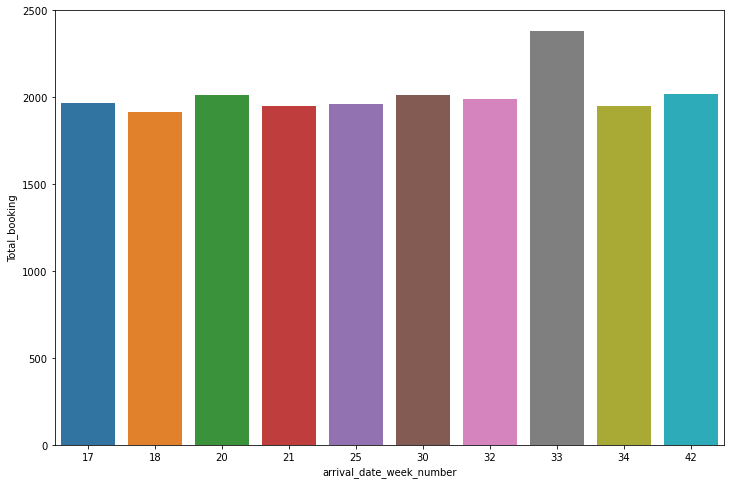

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=weekly_booking,
           x = "arrival_date_week_number",
           y = "Total_booking")

Week 33 is the most popular week people book more than any other week of the year and looking at that week, it certainly falls in the August month.

In [51]:
#checking customer type and the number of bookings made by each group
customer_types = city_hotel.customer_type.value_counts().reset_index().rename(columns=({"index":"customer_type", 
                                                                                        "customer_type":"Total_booking"}))
customer_types

,customer_type,Total_booking
0,Transient,59382
1,Transient-Party,17332
2,Contract,2300
3,Group,292


<AxesSubplot:xlabel='customer_type', ylabel='Total_booking'>

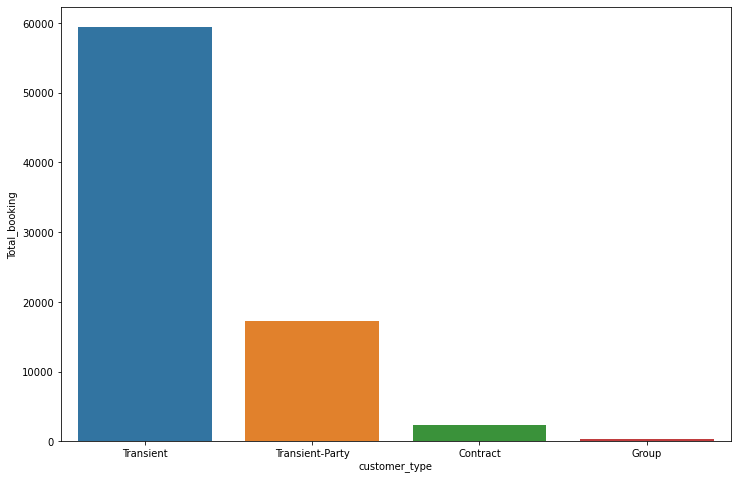

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=customer_types,
           x = "customer_type",
           y = "Total_booking")

Wow!!!! The transient customer type dominated the city hotel from 2015 to 2017 with almost 60,000 of them, however , people who come in group are so little.

In [53]:
# seeing top 25 nationals who dominated the booking over the 3 years
city_nationals =city_hotel.country.value_counts().reset_index().rename(columns=({"index":"country", 
                                                                                        "country":"Total"})).head(25)
city_nationals

,country,Total
0,PRT,30960
1,FRA,8804
2,DEU,6084
3,GBR,5315
4,ESP,4611
5,ITA,3307
6,BEL,1894
7,BRA,1794
8,USA,1618
9,NLD,1590


<AxesSubplot:xlabel='country', ylabel='Total'>

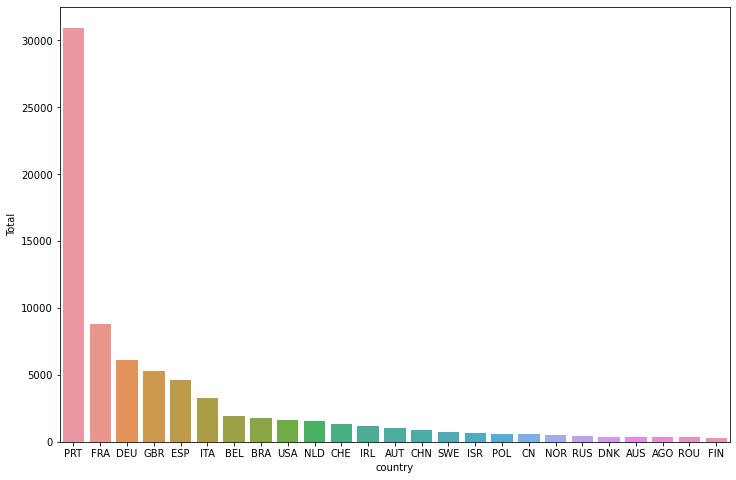

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=city_nationals,
           x = "country",
           y = "Total")

In [55]:
city_hotel.country.value_counts(normalize=True).head(20)

PRT    0.390387
FRA    0.111013
DEU    0.076716
GBR    0.067019
ESP    0.058142
ITA    0.041699
BEL    0.023882
BRA    0.022621
USA    0.020402
NLD    0.020049
CHE    0.016329
IRL    0.015245
AUT    0.013278
CHN    0.010907
SWE    0.009079
ISR    0.008083
POL    0.007389
CN     0.007175
NOR    0.006103
RUS    0.005586
Name: country, dtype: float64

The most populated national are the partuguese with almost 40 percent of the entire customers patronizing city hotel from 2015 to 2017.

## LOOKING INTO THE RESORT HOTEL

In [57]:
#filtering the resort hotel booking information from the df dataframe
resort_hotel = df.loc[df["hotel"] == "Resort Hotel"].reset_index(drop=True)

In [58]:
# A look of the first five
resort_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [59]:
# Also grouping by year to see the year with the highest booking
yearly_booking = resort_hotel.groupby("arrival_date_year").agg({"arrival_date_month" : "count"}
                                           ).reset_index().rename(columns=({"arrival_date_month": "Total_booking"}))

<AxesSubplot:xlabel='arrival_date_year', ylabel='Total_booking'>

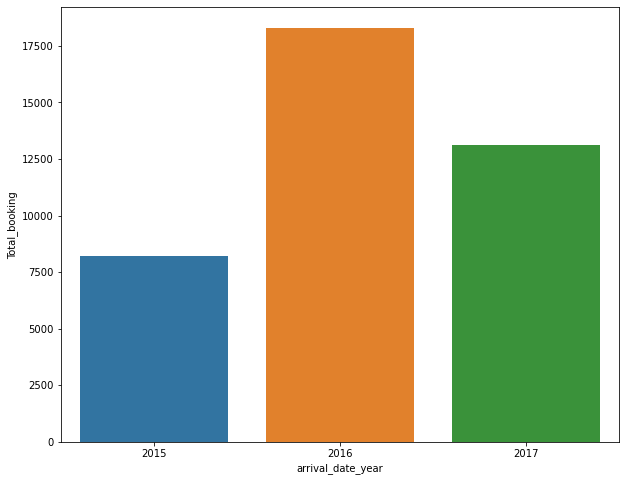

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=yearly_booking,
           x = "arrival_date_year",
           y = "Total_booking")

In [65]:
# grouping by month to see the month with the highest booking in the course of the 3 years 
monthly_booking = resort_hotel.groupby("arrival_date_month").agg({"arrival_date_year" : "count"}).reset_index()
# renaming "arrival_date_year" to "Total_booking"
monthly_booking = monthly_booking.rename(columns=({"arrival_date_year": "Total_booking"})).sort_values("Total_booking")

<AxesSubplot:xlabel='arrival_date_month', ylabel='Total_booking'>

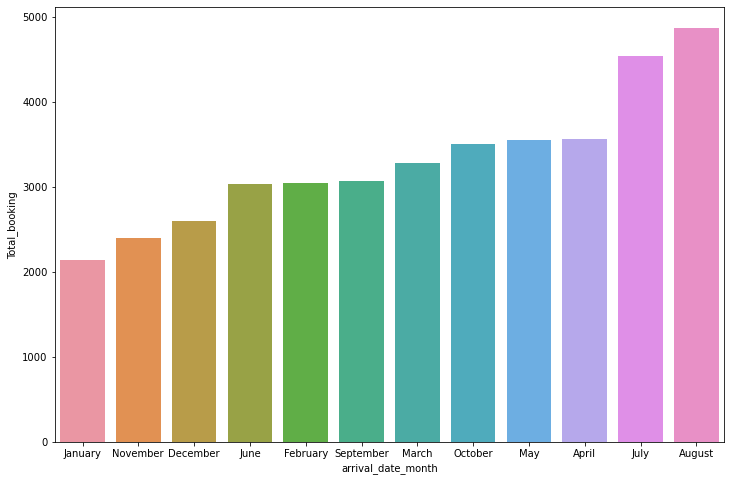

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=monthly_booking,
         x= "arrival_date_month",
        y = "Total_booking")


It's not a surprise to see the same trend with resort hotel as well, the peak season will always be the summer period.

In [67]:
# checking the same for the week number in a year over the 3 years 
weekly_booking =resort_hotel.groupby("arrival_date_week_number")["adr"].count().reset_index()
# renaming "adr" column to "Total_booking"
weekly_booking = weekly_booking.rename(columns=({"adr":"Total_booking"})).sort_values("Total_booking", ascending = False
                                                                                     ).head(10)
weekly_booking

,arrival_date_week_number,Total_booking
32,33,1189
30,31,1092
33,34,1088
29,30,1069
31,32,1051
28,29,1031
17,18,995
27,28,980
34,35,948
42,43,904


<AxesSubplot:xlabel='arrival_date_week_number', ylabel='Total_booking'>

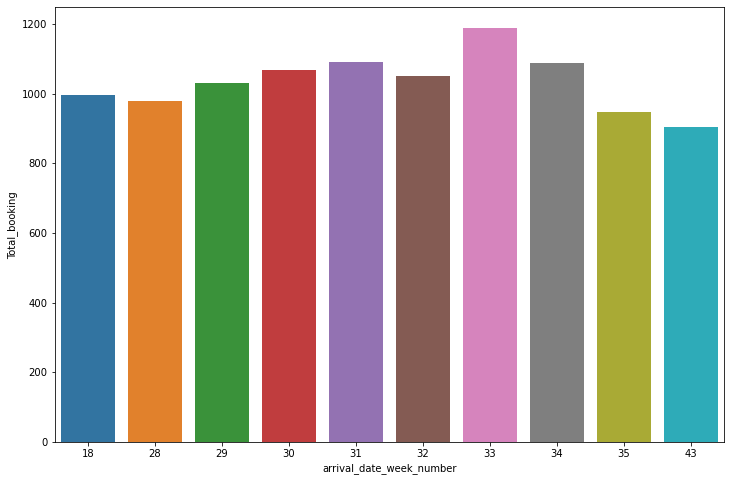

In [68]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=weekly_booking,
           x = "arrival_date_week_number",
           y = "Total_booking")

Again week 33 stood out with almost 1200 booking made that week in a period of 3 years.

In [69]:
# seeing the customer type dominance
resort_customer_types = resort_hotel.customer_type.value_counts().reset_index().rename(columns=({"index":"customer_type", 
                                                                                        "customer_type":"Total_booking"}))

<AxesSubplot:xlabel='customer_type', ylabel='Total_booking'>

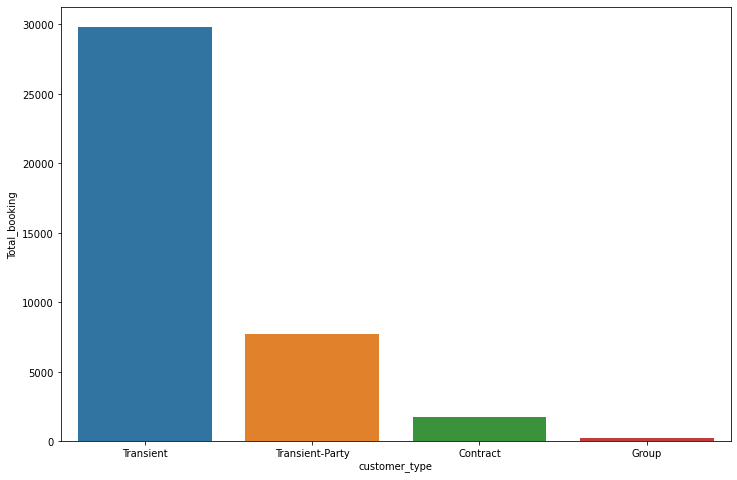

In [70]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=resort_customer_types,
           x = "customer_type",
           y = "Total_booking")

In [72]:
# the national dominace 
resort_nationals = resort_hotel.country.value_counts().reset_index().rename(columns=({"index":"country", 
                                                                                        "country":"Total"})).head(20)
resort_nationals

,country,Total
0,PRT,17630
1,GBR,6814
2,ESP,3957
3,IRL,2166
4,FRA,1611
5,DEU,1203
6,CN,710
7,NLD,514
8,USA,479
9,ITA,459


<AxesSubplot:xlabel='country', ylabel='Total'>

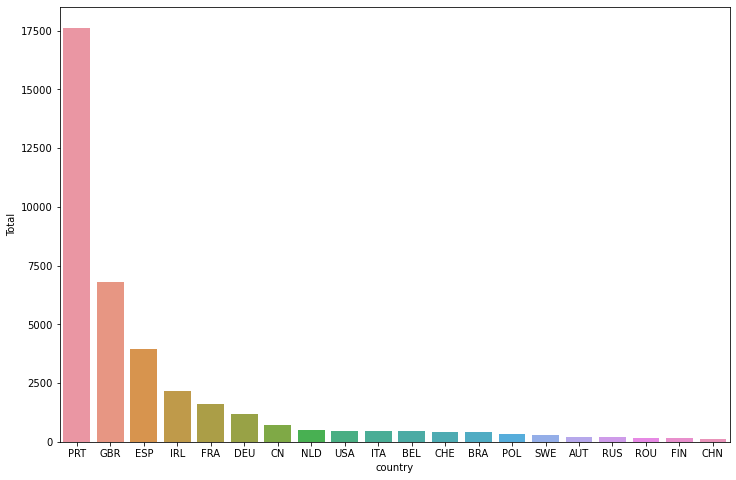

In [73]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=resort_nationals,
           x = "country",
           y = "Total")


Portuguese dominated the resort hotel as well , however British people came second here compare to city hotel where french people are the second most populous.

## CONCLUSION
The peak period for both hotel is in the week 33 of August.

The most dominant national in both hotel are the portuguese.

The city hotel are more populated in terms of booking compare to the Resort hotel.